# Рунге, часть 3

In [1]:
import math
size = 2   # количество функций

In [2]:
# начальные данные
p_atm = 1e+5
S_a = 0.0001

q = 1e-3
c = 1e-9

B = 1
g = 9.81
mu = 0.09
gam = 9.81

ck = c

In [3]:
sign = lambda x: (1, -1)[x < 0]
sign(-5), sign(5)

(-1, 1)

In [4]:
def fun2(t, y, qA):    # t, y = const
    # q = q насоса
    k = (q - qA) / ck
    return k

In [5]:
def fun3(t, qA, pA, pa, S): # pA - вход, pa - выход, pa = p_atm
    qA_next = B * (mu * S * sign(pA - pa) * math.sqrt(2 * g / abs(pA - pa) / gam) - qA)
    return qA_next

In [6]:
def Runge(t, y, h):  # t - значение узла, y - значения в точке t
    # коэффициенты Рунге
    k = [[0] for _ in range(4)]
    # значения 2-ух функций на следующем узле
    y_result = [0] * size
    # копия в текущем узле (для перемен)
    y_local = y.copy()
    
    # pA: fun2(t, y, qA)
    k[0] = fun2(t, y_local[0], y_local[1])
    k[1] = fun2(t + h / 2, y_local[0] + h * k[0] / 2, y_local[1])
    k[2] = fun2(t + h / 2, y_local[0] + h * k[1] / 2, y_local[1])
    k[3] = fun2(t + h, y_local[0] + h * k[2], y_local[1])
    kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
    # новое значение p
    y_result[0] = y_local[0] + h * kn
    y_local[0] += h * kn

    # qA: fun3(t, qA, pA, pa, S)
    k[0] = fun3(t, y_local[1], y_local[0], p_atm, S_a)
    k[1] = fun3(t + h / 2, y_local[1] + h * k[0] / 2, y_local[0], p_atm, S_a)
    k[2] = fun3(t + h / 2, y_local[1] + h * k[1] / 2, y_local[0], p_atm, S_a)
    k[3] = fun3(t + h, y_local[1] + h * k[2], y_local[0], p_atm, S_a)
    kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
    # новое значение q
    y_result[1] = y_local[1] + h * kn
    y_local[1] += h * kn
    
    return y_result

In [7]:
def hydraulic(t_min, t_max, count):
    h = (t_max - t_min) / count
    t = [(t_max - t_min) * i / count for i in range(count + 1)]

    result = [[p_atm, 0]]

    for i in range(count):
        result.append(Runge(t[i], result[i], h))

    return result, t, h

In [8]:
tmin = 0
tmax = 80
count = 100
count2 = 200
count3 = 400

count4 = 800
count5 = 1600
count6 = 3200

count7 = 6400
count8 = 12800
count9 = 25600

In [9]:
result, t, h = hydraulic(tmin, tmax, count)
result2, t2, h2 = hydraulic(tmin, tmax, count2)
result3, t3, h3 = hydraulic(tmin, tmax, count3)
result4, t4, h4 = hydraulic(tmin, tmax, count4)
result5, t5, h5 = hydraulic(tmin, tmax, count5)
result6, t6, h6 = hydraulic(tmin, tmax, count6)
result7, t7, h7 = hydraulic(tmin, tmax, count7)
result8, t8, h8 = hydraulic(tmin, tmax, count8)
result9, t9, h9 = hydraulic(tmin, tmax, count9)

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

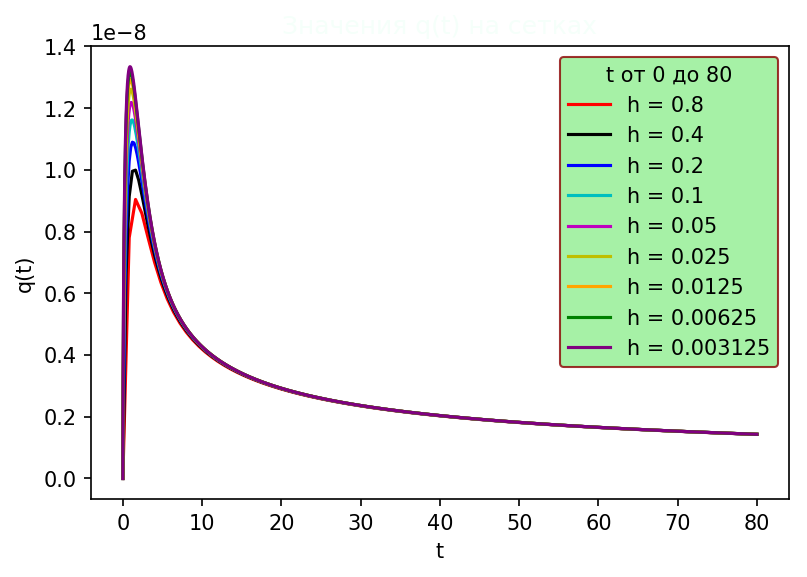

In [11]:
plt.subplots(dpi=150)
plt.title("Значения q(t) на сетках", color='mintcream')
plt.xlabel("t")
plt.ylabel("q(t)")
plt.plot(t, [result[i][1] for i in range(count + 1)], label='h = ' + str(h), color='r')
plt.plot(t2, [result2[i][1] for i in range(count2 + 1)], label='h = ' + str(h2), color='k')
plt.plot(t3, [result3[i][1] for i in range(count3 + 1)], label='h = ' + str(h3), color='b')
plt.plot(t4, [result4[i][1] for i in range(count4 + 1)], label='h = ' + str(h4), color='c')
plt.plot(t5, [result5[i][1] for i in range(count5 + 1)], label='h = ' + str(h5), color='m')
plt.plot(t6, [result6[i][1] for i in range(count6 + 1)], label='h = ' + str(h6), color='y')
plt.plot(t7, [result7[i][1] for i in range(count7 + 1)], label='h = ' + str(h7), color='orange')
plt.plot(t8, [result8[i][1] for i in range(count8 + 1)], label='h = ' + str(h8), color='green')
plt.plot(t9, [result9[i][1] for i in range(count9 + 1)], label='h = ' + str(h9), color='purple')
plt.legend(facecolor='lightgreen', edgecolor='darkred', title="t от " + str(tmin) + " до " + str(tmax))

In [12]:
result9[count9][1]

1.4320789369403393e-09

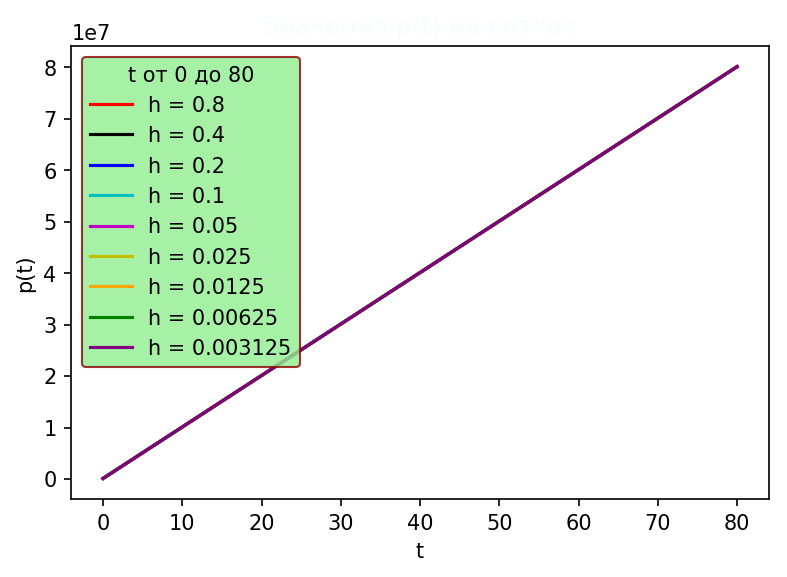

In [13]:
plt.subplots(dpi=150)
plt.title("Значения p(t) на сетках", color='mintcream')
plt.xlabel("t")
plt.ylabel("p(t)")
plt.plot(t, [result[i][0] for i in range(count + 1)], label='h = ' + str(h), color='r')
plt.plot(t2, [result2[i][0] for i in range(count2 + 1)], label='h = ' + str(h2), color='k')
plt.plot(t3, [result3[i][0] for i in range(count3 + 1)], label='h = ' + str(h3), color='b')
plt.plot(t4, [result4[i][0] for i in range(count4 + 1)], label='h = ' + str(h4), color='c')
plt.plot(t5, [result5[i][0] for i in range(count5 + 1)], label='h = ' + str(h5), color='m')
plt.plot(t6, [result6[i][0] for i in range(count6 + 1)], label='h = ' + str(h6), color='y')
plt.plot(t7, [result7[i][0] for i in range(count7 + 1)], label='h = ' + str(h7), color='orange')
plt.plot(t8, [result8[i][0] for i in range(count8 + 1)], label='h = ' + str(h8), color='green')
plt.plot(t9, [result9[i][0] for i in range(count9 + 1)], label='h = ' + str(h9), color='purple')
plt.legend(facecolor='lightgreen', edgecolor='darkred', title="t от " + str(tmin) + " до " + str(tmax))